In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount('mnt')

In [3]:
# !pip install import_ipynb

In [4]:
# %cd "/content/mnt/MyDrive/Game_of_Life"

import import_ipynb
from environment import GameOfLifeEnv
from utils import *

importing Jupyter notebook from utils.ipynb


## The algorithm

In [19]:
def Q_Learning2(Q, env, subregion_size=4, N_games=100, alpha=0.50, gamma=0.9, eps=0.1):

# its a 2D array with shape 2^(subregion_size^2) x subregion_size^2

    for game in range(N_games):
        state = env.reset()

        done = False
        while not done:
            subregions_ids = get_subregions_ids(state, subregion_size)
            subregion, a = select_region_and_action(Q, subregion_size, eps, subregions_ids)
            subregion_id = subregions_ids[subregion]
            action_in_grid = convert_action(env.grid_size, subregion_size, subregion, a)

            state, r, done = env.step(action_in_grid)
            new_subregions_ids = get_subregions_ids(state, subregion_size)
            subregion_p_id = new_subregions_ids[subregion]
            if subregion_p_id not in Q:
                Q[subregion_p_id] = np.zeros(subregion_size ** 2)

            # update value function
            Q[subregion_id][a] += alpha * (r + gamma*np.max(Q[subregion_p_id]) - Q[subregion_id][a])

    return Q

In [8]:
subregion_size = 4
env = GameOfLifeEnv(grid_size=8, density=0.4, seed=42)
state = env.reset()
print('initial state \n', state)
print('inital subregions ids', get_subregions_ids(state, subregion_size))
Q = {}

N_games = 5
alpha = 0.5
gamma = 1.0
eps = 0.5
Q = Q_Learning2(Q, env,subregion_size, N_games, alpha, gamma, eps)

initial state 
 [[1 0 0 0 1 1 1 0]
 [0 0 1 0 0 1 1 1]
 [1 0 0 1 0 1 1 1]
 [0 0 1 0 0 1 0 1]
 [1 0 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]
 [0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 1]]
inital subregions ids [18753 44775 62033 45139]


In bigger grids we observe the following tendencies:
- The time for reaching the end of the game with agent is more
- The average reward at the last step of the game is lower for the random agent. That's because the agent destroys stable structures; games with agent finish with dead cells almost all of the time.

# Training

In [ ]:
# # %%timeit        

In [22]:
%matplotlib inline

def plot_after_avg(env, Q, subregion_size, trained_for):
    max_gen_to_plot = 400
#     subregion_size = 4
#     N_games = 20
    eps = 0
    fig, ax = plt.subplots()

    all_rewards_Q = np.zeros(max_gen_to_plot)
    all_rewards_no_action = np.zeros_like(all_rewards_Q)
    all_rewards_r = np.zeros_like(all_rewards_Q)

    # actions from the Q function
    N_games = 30
    for i in range(N_games):
        state = env.reset()
        rewards_Q = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_Q)):
            if not done:
                subregions_ids = get_subregions_ids(state, subregion_size)
                subregion, a = select_region_and_action(Q, subregion_size, eps, subregions_ids)
                action_in_grid = convert_action(env.grid_size, subregion_size, subregion, a)
                state, r, done = env.step(action_in_grid)
                rewards_Q[j] = r
        all_rewards_Q = all_rewards_Q + rewards_Q
    avg_Q = all_rewards_Q / N_games

    # base evolution
    N_games = 1
    for i in range(N_games):
        env.reset()
        rewards_no_action = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_no_action)):
            if not done:
                _, r, done = env.step(None)
                rewards_no_action[j] = r

        all_rewards_no_action = all_rewards_no_action + rewards_no_action
    avg_no_action = all_rewards_no_action / N_games

    # taking random actions
    N_games = 30
    for i in range(N_games):
        state = env.reset()
        rewards_r = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_r)):
            if not done:
                a = take_random_action(state)
                _, r, done = env.step(a)
                rewards_r[j] = r
        all_rewards_r = all_rewards_r + rewards_r
    avg_random = all_rewards_r / N_games

    ax.set_title(f'Rewards averaged over 50 games after Q-learning for a fixed initial state')
    ax.plot(avg_no_action[:max_gen_to_plot], linewidth = 2, label='without agent')
    ax.plot(avg_random[:max_gen_to_plot], linewidth = 2, label='taking random actions')
    ax.plot(avg_Q[:max_gen_to_plot], linewidth = 2, label='using learned Q-function')

    plt.legend()
    ax.set_xlabel('generations')
    ax.set_ylabel('reward')
    name = f'figs/project/subd_seed{env.seed}_{trained_for}_games_grid{env.grid_size}_subreg_size{subregion_size}'
    plt.savefig(name, transparent=True, bbox_inches='tight')

[[1 0 0 0]
 [1 1 1 0]
 [0 0 1 0]
 [0 1 1 1]]


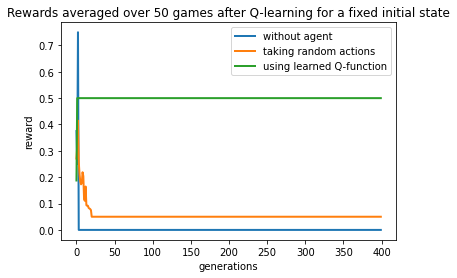

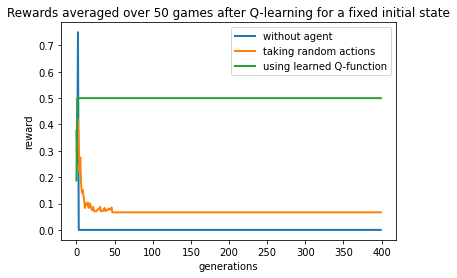

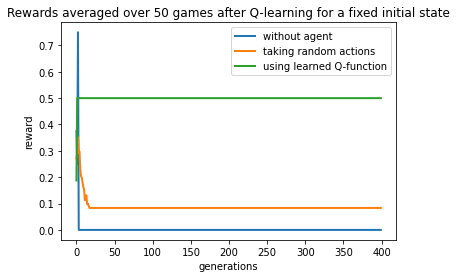

In [23]:
subregion_size = 4
env = GameOfLifeEnv(grid_size=4, density=0.4, seed=42, max_generations=400)
print(env.reset())

Q = {}
trained_for = 0
alpha = 0.5
gamma = 1.0

##########################################################################
N_games = 200
eps = 0.5
Q_Learning2(Q, env,subregion_size, N_games, alpha, gamma, eps)
trained_for += N_games

plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

##########################################################################
N_games = 300
eps = 0.3
Q_Learning2(Q, env,subregion_size, N_games, alpha, gamma, eps)
trained_for += N_games

plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

##########################################################################
N_games = 500
eps = 0.3
Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
trained_for += N_games

plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

# ##########################################################################
# N_games = 1000
# eps = 0.1
# Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
# trained_for += N_games

# plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

# ##########################################################################
# N_games = 3000
# eps = 0.1
# Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
# trained_for += N_games

# plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

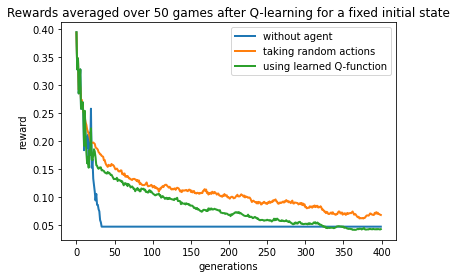

In [21]:
# ##########################################################################
# N_games = 3000
# eps = 0.1
# Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
# trained_for += N_games

plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

In [7]:
visited_states = 0
for e, i in enumerate(Q): 
    if np.sum(i) > 0:
        visited_states += 1
print(f'Trained for a total of {trained_for} games, visited states: {visited_states}/{len(Q)}')

Trained for a total of 5000 games, visited states: 161736/33554432


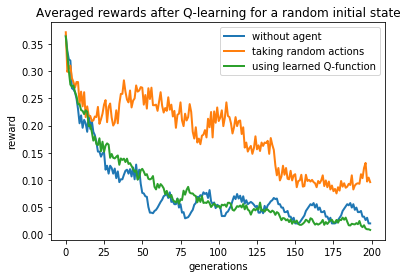

In [54]:
# N_games = 2000
# eps = 0.08
# Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
# trained_for += N_games

# plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)

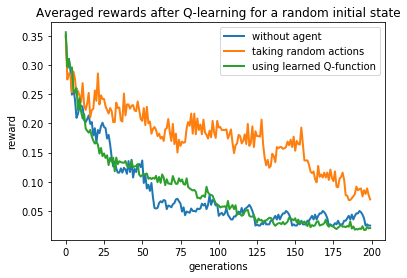

In [57]:
# N_games = 2000
# eps = 0.08
# Q_Learning2(Q, env, subregion_size, N_games, alpha, gamma, eps)
# trained_for += N_games

# plot_after_avg(env=env, Q=Q, subregion_size=subregion_size, trained_for=trained_for)